In [2]:
import numpy as np
import numpy.random as npr
import numba
import matplotlib.pyplot as plt
from scipy.special import softmax, factorial
from tqdm import trange

[0.87950903 0.12049097]


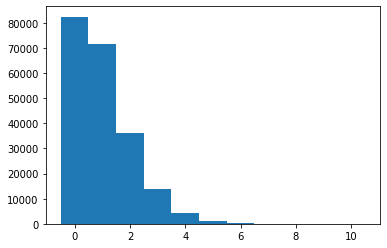

In [3]:
K = 2      # number of mixtures
nX = 10    # number of independent variables
nY = 21     # number of dependent variables
N = 10000  # number of datapoints

weight_scale = .3

alpha = 1.0
pi = npr.dirichlet([alpha] * K)
print(pi)

ztrue = np.sort(npr.choice(K, p=pi, size=N))

Wtrue = npr.randn(K, nY, nX + 1) * weight_scale

X = npr.randn(N, nX) * weight_scale
X = np.column_stack((X, np.ones(N)))
Y = np.zeros((N, nY))

for k in range(K):
    idx = (ztrue == k)
    Y[idx] = npr.poisson(np.exp(X[idx] @ Wtrue[k].T))

Yfactorial = factorial(Y)

plt.hist(Y.ravel(), bins=np.arange(-.5, Y.max()+1));

In [6]:
from lvl.glm import poiss_glm_mixture

W, resp, log_like_hist = poiss_glm_mixture(2, X, Y, glm_method="pass", em_iters=15, max_iter=1)

100%|██████████| 15/15 [00:00<00:00, 17.61it/s]


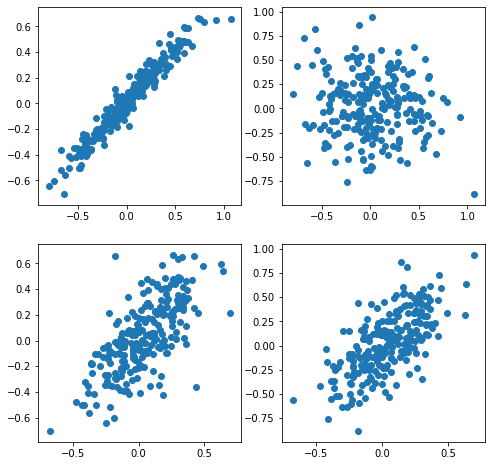

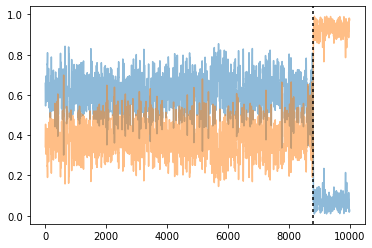

In [8]:
import itertools
fig, axes = plt.subplots(K, K, figsize=(8, 8))

for k1, k2 in itertools.product(range(K), range(K)):
    axes[k1, k2].scatter(W[k1].ravel(), Wtrue[k2].ravel())
    
from scipy.ndimage import gaussian_filter1d
fig, axes = plt.subplots(1, 1)
axes.plot(gaussian_filter1d(resp, 3, axis=1).T, '-', alpha=.5)
axes.axvline(np.where(np.diff(ztrue) == 1)[0][0], color='k', dashes=[2, 2])